In [142]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Path Map

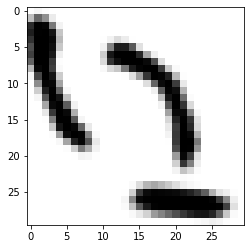

In [143]:
import cv2
fn = 'navigation.png'
img1 = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)
imgplot1 = plt.imshow(img1,cmap="gray")
plt.show()

In [144]:
val_arr1=np.array(img1)
val_arr1.shape

(30, 30)

# Goal: To go from (0,30) to (30,0)

## We will use informed Astar search to find the path

__note: lets threshold the image for easy coding__

In [145]:
blocked=[]
for i in range(val_arr1.shape[0]):
    for j in range(val_arr1.shape[1]):
        if val_arr1[i][j]>200:
            val_arr1[i][j]=1
        else:
            val_arr1[i][j]=0
            blocked.append((i,j))

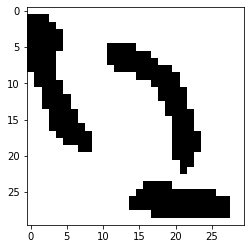

In [146]:
plt.imshow(val_arr1,cmap="gray")

## Let's create some helper functions

In [316]:
def determine(x,maxlenx,maxleny):
    """Keep robot within maze"""
    if x[0]<0 or x[0]>=maxlenx or x[1]<0 or x[1]>=maxleny:
        return True
    else:
        return False


def next_states(imgin,i,j,maxlenx,maxleny):
    poss_n=[((i+1,j),1),((i,j+1),1),((i+1,j+1),1.41),((i-1,j-1),1.41),((i-1,j),1),((i,j-1),1),((i-1,j+1),1.41),((i+1,j-1),1.41)]
    poss_n=[x for x in poss_n if not determine(x[0],maxlenx,maxleny)]
    return [x for x in poss_n if imgin[x[0][0]][x[0][1]]==1]

def eucliden_distance(p1,p2):
    return ((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)**0.5

def manhatten_distance(p1,p2):
    return abs(p1[0]-p2[0])+abs(p1[1]-p2[1])

def step(p1,p2):
    x=p1[0]
    y=p1[1]
    if (p2[0]-p1[0]==2):
        x=p1[0]+1
    if (p2[0]-p1[0]==-2):
        x=p1[0]-1
    if (p2[1]-p1[1]==2):
        y=p1[1]+1
    if (p2[1]-p1[1]==-2):
        y=p1[1]-1
    return x,y

## AStar Informed Search

In [339]:
def search(maze,start,end,solver=manhatten_distance):
    
    start=(start[1],start[0])
    end=(end[1],end[0])
    # maintain a list of visited nodes
    visited=[start]
    # path to be returned
    path=[]
    cur=start
    # total actual cost
    totprevcost=0
    # iteration
    while True:
        path.append(cur)
        #goal state
        if cur==end:
            break
        # to select best next state
        frontier=[]
        # iteration on all connected nodes to current node
        for node,stepcost in next_states(maze,cur[0],cur[1],maze.shape[0],maze.shape[1]):
#             print(node,end=' ')
            if node not in visited:
            # full cost calculation
            # step cost is 1
            # f(n) = g(n) + h(n)
                fcost=totprevcost+stepcost+solver(node,end)
                frontier.append((node,fcost,stepcost))
                visited.append(node)
            # finding the smallest full cost for all connected nodes
        frontier.sort(key=lambda x:x[1])
#         print(frontier)
            # selecting smallest full cost node as the next node on path
#         print(frontier)
        if not frontier:
            print("deadlocked on corner")
            return path,totprevcost
        cur = frontier[0][0]
#         cur=step(cur,new_pos)
        
        totprevcost+=frontier[0][2]
#         print(path)
    return path,totprevcost

In [340]:
path=search(val_arr1,(5,0),(15,20))[0]

In [341]:
next_states(val_arr1,0,0,val_arr1.shape[0],val_arr1.shape[1])

[((0, 1), 1)]

In [342]:
eucliden_distance((0,0),(1,1))

1.4142135623730951

In [343]:
val_arr1[0][29]

1

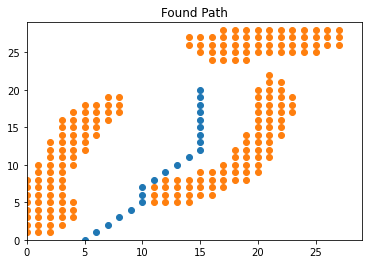

In [344]:
#since we have 3 patches
x1=[x[0] for x in path]
y1=[x[1] for x in path]
x2=[x[0] for x in blocked]
y2=[x[1] for x in blocked]
plt.scatter(y1,x1)
plt.scatter(y2,x2)

plt.xlim(0, 29)
plt.ylim(0, 29)
# plt.gca().invert_yaxis()
# plt.gca().invert_xaxis()
plt.title("Found Path")
plt.show()


In [345]:
path

[(0, 5),
 (1, 6),
 (2, 7),
 (3, 8),
 (4, 9),
 (5, 10),
 (6, 10),
 (7, 10),
 (8, 11),
 (9, 12),
 (10, 13),
 (11, 14),
 (12, 15),
 (13, 15),
 (14, 15),
 (15, 15),
 (16, 15),
 (17, 15),
 (18, 15),
 (19, 15),
 (20, 15)]

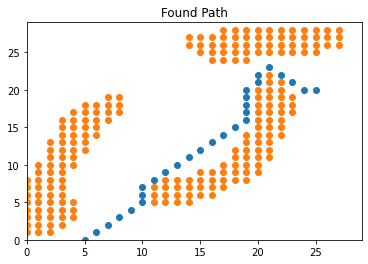

In [351]:
path=search(val_arr1,(5,0),(25,20))[0]
#since we have 3 patches
x1=[x[0] for x in path]
y1=[x[1] for x in path]
x2=[x[0] for x in blocked]
y2=[x[1] for x in blocked]
plt.scatter(y1,x1)
plt.scatter(y2,x2)

plt.xlim(0, 29)
plt.ylim(0, 29)
# plt.gca().invert_yaxis()
# plt.gca().invert_xaxis()
plt.title("Found Path")
plt.show()

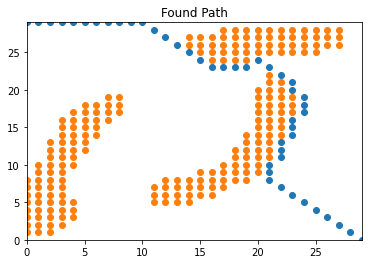

In [352]:
path=search(val_arr1,(29,0),(0,29))[0]
#since we have 3 patches
x1=[x[0] for x in path]
y1=[x[1] for x in path]
x2=[x[0] for x in blocked]
y2=[x[1] for x in blocked]
plt.scatter(y1,x1)
plt.scatter(y2,x2)

plt.xlim(0, 29)
plt.ylim(0, 29)
# plt.gca().invert_yaxis()
# plt.gca().invert_xaxis()
plt.title("Found Path")
plt.show()

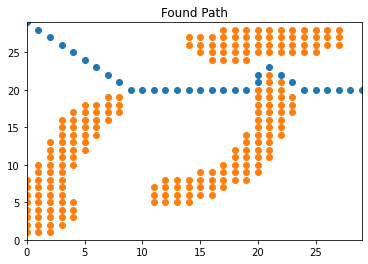

In [353]:
path=search(val_arr1,(0,29),(29,20))[0]
#since we have 3 patches
x1=[x[0] for x in path]
y1=[x[1] for x in path]
x2=[x[0] for x in blocked]
y2=[x[1] for x in blocked]
plt.scatter(y1,x1)
plt.scatter(y2,x2)

plt.xlim(0, 29)
plt.ylim(0, 29)
# plt.gca().invert_yaxis()
# plt.gca().invert_xaxis()
plt.title("Found Path")
plt.show()

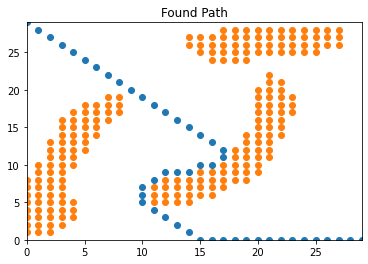

In [354]:
path=search(val_arr1,(0,29),(29,0))[0]
#since we have 3 patches
x1=[x[0] for x in path]
y1=[x[1] for x in path]
x2=[x[0] for x in blocked]
y2=[x[1] for x in blocked]
plt.scatter(y1,x1)
plt.scatter(y2,x2)

plt.xlim(0, 29)
plt.ylim(0, 29)
# plt.gca().invert_yaxis()
# plt.gca().invert_xaxis()
plt.title("Found Path")
plt.show()